Author: Bram van Duinen

Date last edited: 20 nov 2023

Content: This notebook takes the co_occurences calculated in calc_co-occur and plots these on maps for each countries. Figures are saved in the Figures folder, with a subfolder produced for the date of the run.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import cartopy
from cartopy.io import shapereader
import cartopy.crs as ccrs
import geopandas
import numpy as np
from datetime import datetime, timedelta
import os
from tqdm.notebook import tqdm

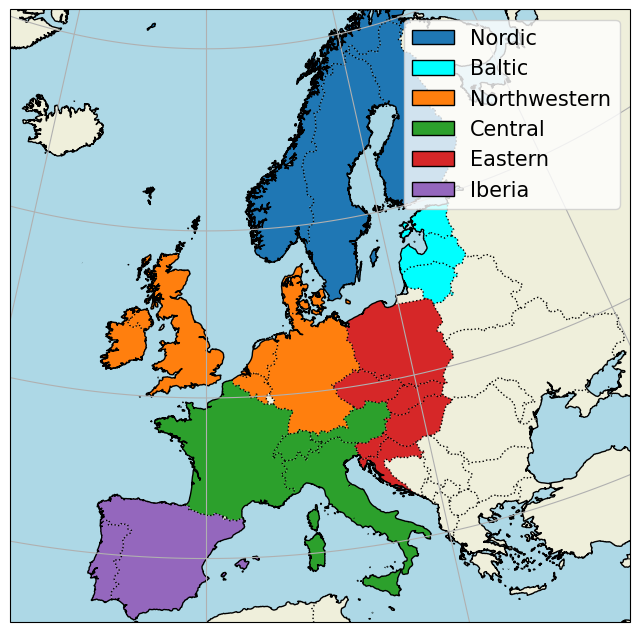

In [3]:
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# Set up the canvas
fig = plt.figure(figsize=(8, 8))
central_lon, central_lat = 0, 52
extent = [-15, 33, 35, 70]
ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=central_lon, central_latitude=central_lat))
ax.set_extent(extent)
ax.gridlines()

# Add natural earth features and borders
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', alpha=1)
ax.add_feature(cartopy.feature.OCEAN, facecolor=("lightblue"))
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='10m')

# Insert your lists of countries and lag times here

countries = ['AUT', 'BEL', 'CHE', 'CZE', 'DEU', 'DNK',
             'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'HRV', 'HUN', 'IRL',
             'ITA', 'LTU', 'LVA', 'NLD', 'NOR', 'POL', 'PRT',
             'SVK', 'SVN', 'SWE']

# regions = {
#     'Nordic + Baltic': ['EST', 'FIN', 'IRL', 'LTU', 'LVA', 'NOR', 'SWE'],
#     'Northwestern': ['BEL', 'DEU', 'GBR', 'NLD', 'IRL', 'DNK'],
#     'Central': ['ITA', 'AUT', 'CHE', 'FRA'],
#     'Eastern': ['POL', 'HRV', 'HUN', 'CZE', 'SVK', 'SVN'],
#     'Iberia': ['ESP', 'PRT'],
# }

# region_colors = {
#     'Nordic + Baltic': 'C0',
#     'Northwestern': 'C1',
#     'Central': 'C2',
#     'Eastern': 'C3',
#     'Iberia': 'C4',
# }

regions = {
    'Nordic': ['FIN', 'NOR', 'SWE'],
    'Baltic': ['EST', 'LTU', 'LVA'],
    'Northwestern': ['BEL', 'DEU', 'GBR', 'NLD', 'IRL', 'DNK'],
    'Central': ['ITA', 'AUT', 'CHE', 'FRA'],
    'Eastern': ['POL', 'HRV', 'HUN', 'CZE', 'SVK', 'SVN'],
    'Iberia': ['ESP', 'PRT'],
}

region_colors = {
    'Nordic': 'C0',
    'Baltic': 'cyan',
    'Northwestern': 'C1',
    'Central': 'C2',
    'Eastern': 'C3',
    'Iberia': 'C4',
}

legend_handles = []


from matplotlib.patches import Rectangle

for region, countries_list in regions.items():
    region_color = region_colors[region]
    
    for country in countries_list:
        poly = df.loc[df['ISO_A3_EH'] == country]['geometry'].values[0]
        ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor=region_color, edgecolor='none', zorder=1)
        
    legend_handles.append(Rectangle((0, 0), 1, 1, facecolor=region_color, edgecolor='black'))
    ax.legend(legend_handles, regions.keys(), loc='upper right', bbox_to_anchor=(1, 1), fontsize = 15)
plt.savefig('../../Results/Figures/regions_clusters_v2.png', dpi=300, bbox_inches='tight')